In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

In [4]:
illinois = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

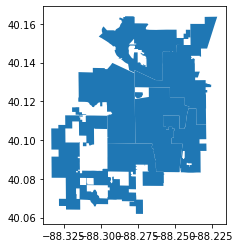

In [5]:
illinois.plot()

In [7]:
il_counties.columns

Index(['OBJECTID_1', 'District', 'Council_me', 'ShapeSTArea', 'ShapeSTLength',
       'geometry'],
      dtype='object')

In [11]:
from ipywidgets import Dropdown
from ipywidgets import interact

In [12]:
il_counties = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

# Calculate population density
il_counties['pop_density'] = il_counties['ShapeSTArea'] / il_counties.geometry.area

# Define the colormap options
cmap_options = {'Blues': 'Blues', 'Greens': 'Greens', 'Reds': 'Reds'}

# Define the interactive function
def plot_map(colormap, data_column):
    fig, ax = plt.subplots(figsize=(10, 8))
    il_counties.plot(column=data_column, cmap=colormap, linewidth=0.5, edgecolor='white', ax=ax)
    ax.axis('off')
    plt.title(f'Illinois County {data_column.title()} ({colormap})')
    plt.show()

# Create the dropdown widgets
cmap_dropdown = Dropdown(options=cmap_options, value='Blues', description='Colormap:')
data_dropdown = Dropdown(options=il_counties.columns, value='pop_density', description='Data Column:')

# Create the interactive plot
interact(plot_map, colormap=cmap_dropdown, data_column=data_dropdown);

/var/folders/qp/0w72qrtx6_z7yczg1b52r0vh0000gn/T/ipykernel_90978/3231856771.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  il_counties['pop_density'] = il_counties['ShapeSTArea'] / il_counties.geometry.area


interactive(children=(Dropdown(description='Colormap:', options={'Blues': 'Blues', 'Greens': 'Greens', 'Reds':…

For my interactive visualization, I chose to allow the user to choose which variable they would like to compare. I focused on population density, and the darker colors represent the more densely populated areas, at least in terms of the density of the specific variables. I also allowed the user to choose which type of color they wanted the colormap. For pop density, I defined it as shape area divdied by geometry area. I allow the user to choose their projection. Individuals who are looking for a location to settle down, may look at this visualization to help them determine if they would like a more heavily populated area based on each projection.

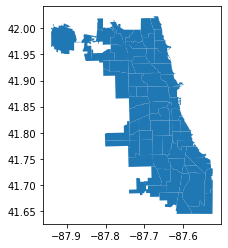

In [21]:
chicago = geopandas.read_file('chicago-community-areas.geojson')
chicago.plot()

In [22]:
chicago.columns

Index(['community', 'area', 'shape_area', 'perimeter', 'area_num_1',
       'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'geometry'],
      dtype='object')

I was planning on doing more w chicago geojson, but become too difficult, I wanted to try to implement a population density map over, but that also became too difficult.